# Notebook 4 — Tiny Grover's Algorithm (2 qubits)
**Goal:** Implement a minimal Grover search for a single marked element among 4 items.

We use Qiskit's building blocks to assemble:
1. State initialization (uniform superposition)
2. Oracle that flips the phase of the marked state
3. Grover diffuser
4. Measurement

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np

backend = Aer.get_backend('qasm_simulator')

In [2]:
def diffuser(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)  # multi-controlled X (may decompose)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))
    return qc

In [3]:
def phase_oracle_for_state(target, n=2):
    # target is a bitstring like '11' or '01'
    qc = QuantumCircuit(n)
    # Apply X to qubits where target bit is '0' so that only the target maps to |11...1>
    for i, bit in enumerate(reversed(target)):
        if bit == '0':
            qc.x(i)
    # Phase flip on |11>
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    # Undo the X
    for i, bit in enumerate(reversed(target)):
        if bit == '0':
            qc.x(i)
    return qc

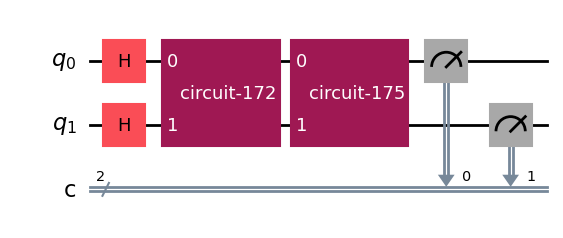

In [4]:
n=2
target = '11'  # try '00','01','10','11'
qc = QuantumCircuit(n, n)

# 1) Init
qc.h(range(n))

# 2) Oracle
qc.append(phase_oracle_for_state(target, n), range(n))

# 3) Diffuser
qc.append(diffuser(n), range(n))

# 4) Measure
qc.measure(range(n), range(n))
qc.draw('mpl')

{'11': 1024}


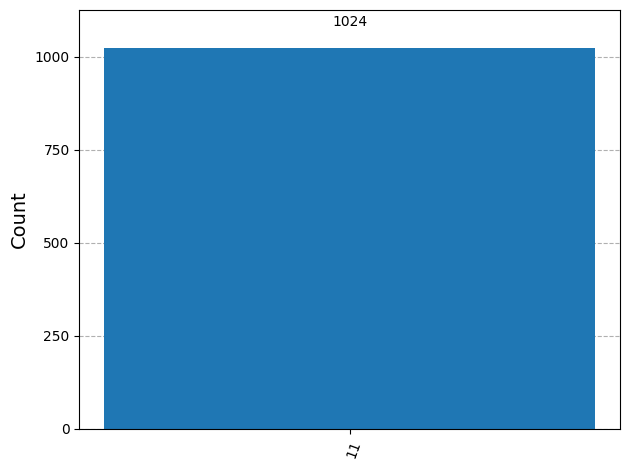

In [5]:
compiled_circuit = transpile(qc, backend)
job = backend.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

**Try it**
- Change `target` to another bitstring and re‑run.
- For 2 qubits, one Grover iteration is enough; for larger N, use `~sqrt(N)` iterations.